In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


In [2]:
def load_data(directory_path):

    datagen = tf.keras.preprocessing.image.ImageDataGenerator()
    
    data_flow = datagen.flow_from_directory(
        directory=directory_path,
        target_size=(64, 64),
        batch_size=10000,  
        class_mode='categorical'
    )
    
    return data_flow

In [3]:
image_directory_path = 'malimg_dataset'

In [4]:
data_flow = load_data(image_directory_path)

Found 9339 images belonging to 1 classes.


In [5]:
data_flow.class_indices

{'malimg_paper_dataset_imgs': 0}

In [6]:
def plot_images(image_batch, label_batch, class_indices, num_images=50):
    fig, axes = plt.subplots(10, 5, figsize=(20, 40))  
    axes = axes.flatten()
    for img, label, ax in zip(image_batch, label_batch, axes):
        ax.imshow(img)
        ax.axis('Off')
        class_label = class_indices[np.argmax(label)]
        ax.set_title(class_label)
    plt.tight_layout()
    plt.show()


In [7]:
images, labels = next(data_flow)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

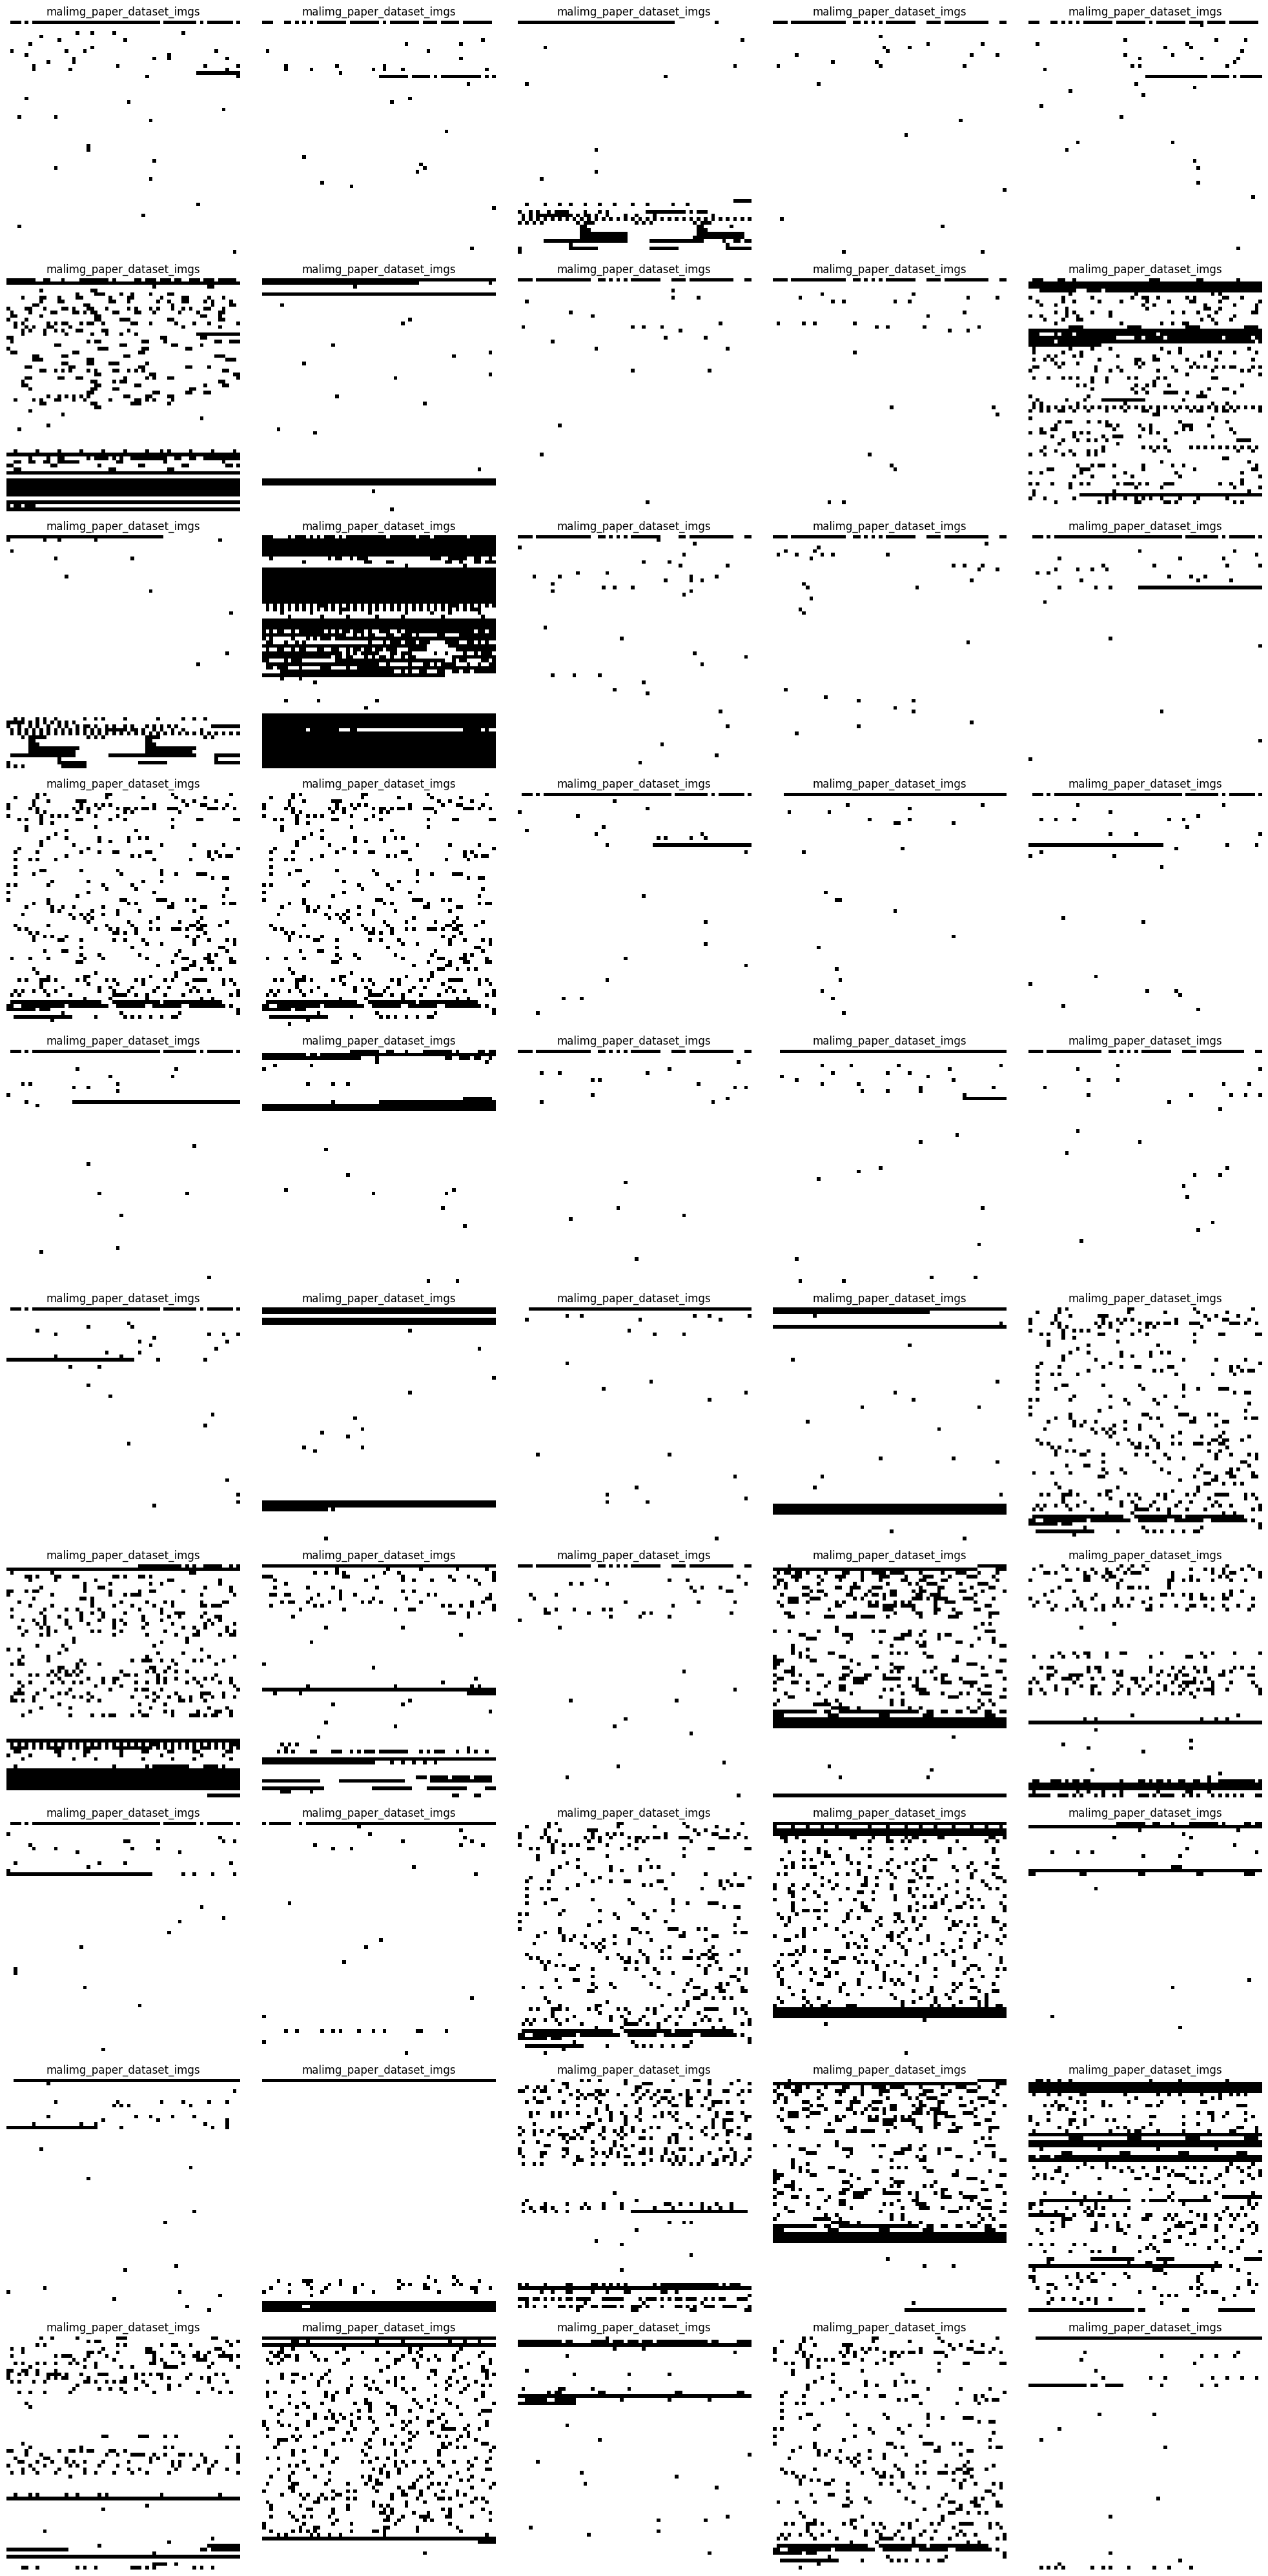

In [8]:
plot_images(images, labels, list(data_flow.class_indices.keys()))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

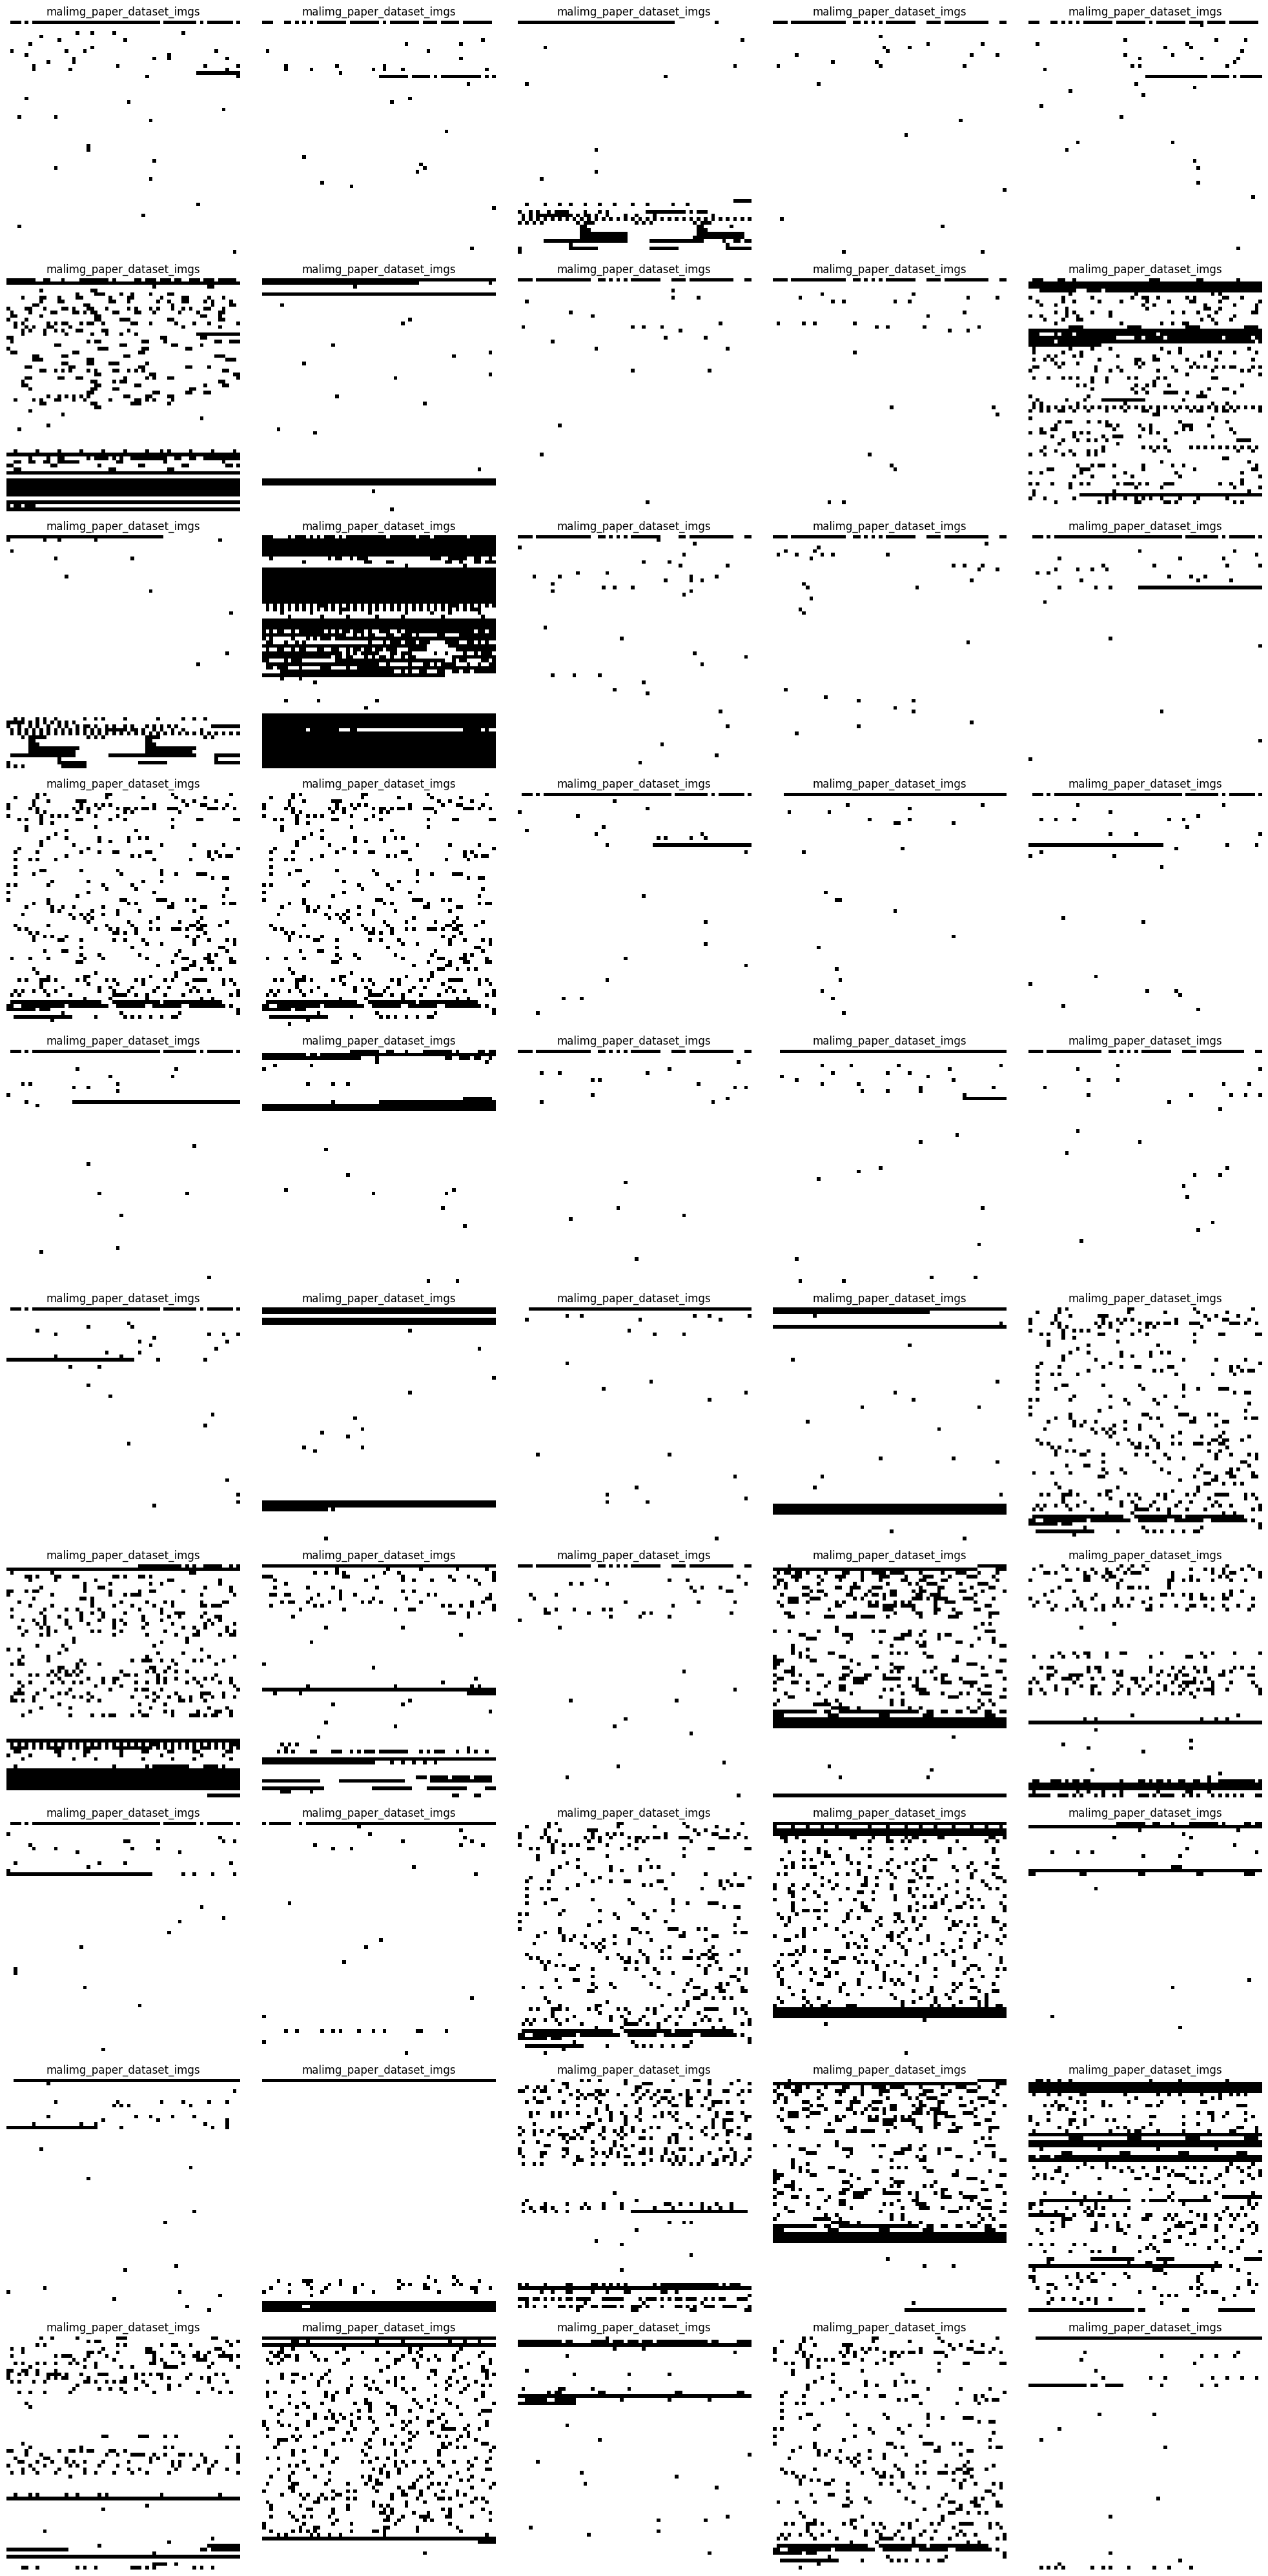

In [9]:
plot_images(images, labels, list(data_flow.class_indices.keys()))

Separacion de la data en train y test. 

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.3  
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.3)


In [12]:
train_data_flow = train_datagen.flow_from_directory(
    directory='malimg_dataset/malimg_paper_dataset_imgs',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',  
    subset='training'
)

validation_data_flow = test_datagen.flow_from_directory(
    directory='malimg_dataset/malimg_paper_dataset_imgs',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',  
    subset='validation'
)


Found 6549 images belonging to 25 classes.
Found 2790 images belonging to 25 classes.


In [13]:
x_batch, y_batch = next(train_data_flow)
print(x_batch.shape, y_batch.shape)

(32, 64, 64, 3) (32, 25)


In [14]:
from tensorflow.keras.layers import Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

model = Sequential([
    Conv2D(32, kernel_size=3, activation="relu", input_shape=(64, 64, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.8),  # Reduced dropout rate
    Dense(25, activation='softmax')
])


model.summary()


C:\Users\alegu\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 62, 62, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 29, 29, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 25)             │        12,825 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,466,777 (9.41 MB)

 Trainable params: 2,466,329 (9.41 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step - accuracy: 0.5115 - loss: 1.4843
Epoch 1: val_loss improved from inf to 10.92446, saving model to best_model.keras
205/205 ━━━━━━━━━━━━━━━━━━━━ 61s 282ms/step - accuracy: 0.5115 - loss: 1.4843 - val_accuracy: 0.1545 - val_loss: 10.9245
Epoch 2/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step - accuracy: 0.5369 - loss: 1.4476
Epoch 2: val_loss did not improve from 10.92446
205/205 ━━━━━━━━━━━━━━━━━━━━ 72s 348ms/step - accuracy: 0.5369 - loss: 1.4475 - val_accuracy: 0.1789 - val_loss: 16.1061
Epoch 3/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step - accuracy: 0.5452 - loss: 1.3793
Epoch 3: val_loss did not improve from 10.92446
205/205 ━━━━━━━━━━━━━━━━━━━━ 96s 461ms/step - accuracy: 0.5451 - loss: 1.3793 - val_accuracy: 0.0817 - val_loss: 23.0291
Epoch 4/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step - accuracy: 0.5490 - loss: 1.4085
Epoch 4: val_loss improved from 10.92446 to 9.39382, saving model to best_model.keras
205/205 ━━━━━━━━━━━━━

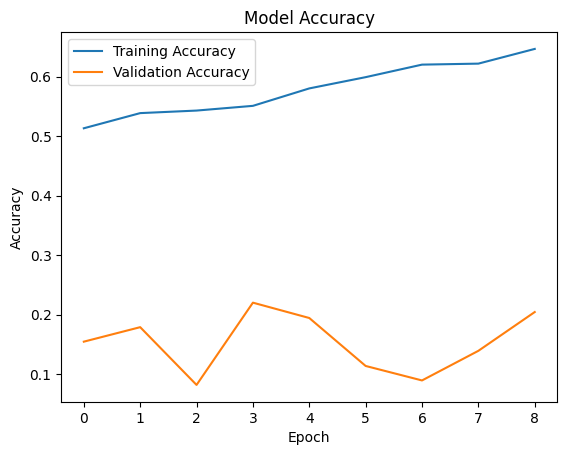

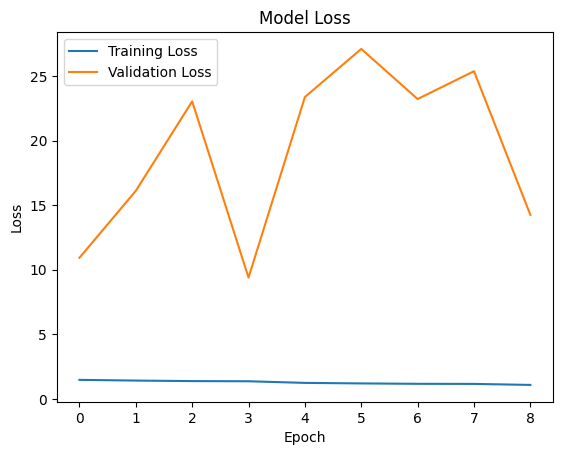

In [16]:

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, verbose=1),
    ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, verbose=1)
]


history = model.fit(
    train_data_flow,
    validation_data=validation_data_flow,
    epochs=20,
    callbacks=callbacks
)


metrics = model.evaluate(validation_data_flow)

model.save('final_malware_model.keras')


plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

from tensorflow.keras.layers import SpatialDropout2D

model = Sequential([
        Conv2D(32, kernel_size=3, activation="relu", input_shape=(64, 64, 3),
               kernel_initializer='he_normal'),  # He initialization
        MaxPooling2D(pool_size=2),
        BatchNormalization(),
        SpatialDropout2D(0.1),  # Spatial Dropout after the first Conv layer
        Conv2D(64, kernel_size=3, activation="relu", kernel_initializer='he_normal'),
        MaxPooling2D(pool_size=2),
        BatchNormalization(),
        SpatialDropout2D(0.2),  # Spatial Dropout after the second Conv layer
        Flatten(),
        Dense(128, activation="relu",
              kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.001, l2=0.001)),
        Dropout(0.5),  # Adjusted Dropout rate
        Dense(25, activation="softmax")  # Adjusted for potentially more classes
    ])

model.compile(
    optimizer="RMSprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"],
    )


callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, verbose=1),
    ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, verbose=1)
]


history = model.fit(
    train_data_flow,
    validation_data=validation_data_flow,
    epochs=20,
    callbacks=callbacks
)


metrics = model.evaluate(validation_data_flow)

model.save('final_malware_model.keras')


